# Video Game Sales

This dataset contains a list of video games with sales greater than 100,000 copies.

It was generated by a scrape of [vgchartz.com](https://www.vgchartz.com/) and is available on [Kaggle](https://www.kaggle.com/gregorut/videogamesales/data).


In [25]:
import pandas as pd

sales = pd.read_csv('https://raw.githubusercontent.com/bosamatheus/video-game-sales/master/vgsales.csv')
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
sales.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Data Dictionary:

- Rank - Ranking of overall sale;
- Name - The games name;
- Platform - Platform of the games release (i.e. PC, PS4, etc.);
- Year - Year of the game's release;
- Genre - Genre of the game;
- Publisher - Publisher of the game;
- NA_Sales - Sales in North America (in millions);
- EU_Sales - Sales in Europe (in millions);
- JP_Sales - Sales in Japan (in millions);
- Other_Sales - Sales in the rest of the world (in millions);
- Global_Sales - Total worldwide sales.

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
len(sales['Name'].unique())

11493

In [7]:
sales_by_year = sales.groupby('Year')['Global_Sales'].sum()
sales_by_year

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


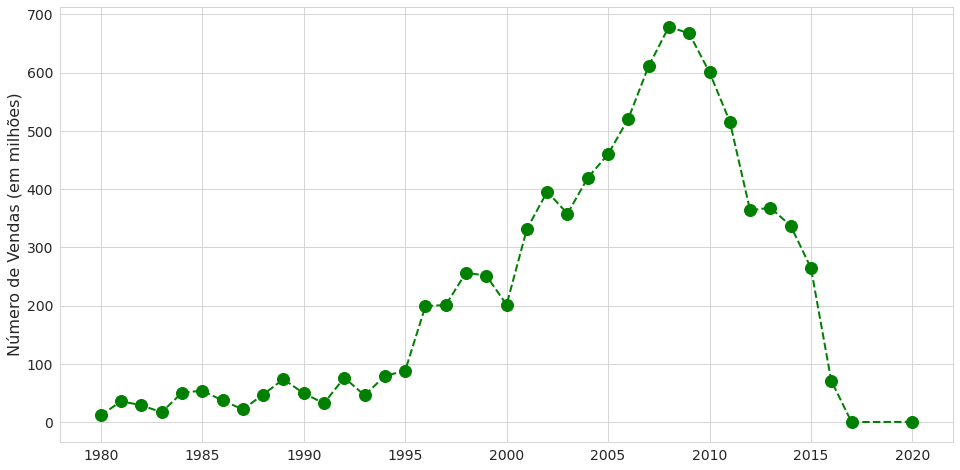

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.figure(figsize=(16,8))
plt.plot(sales_by_year.index, sales_by_year, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)

plt.ylabel('Número de Vendas (em milhões)', fontsize=16)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)

plt.show()

In [9]:
genres = sales['Genre'].unique().tolist()
genres

['Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Puzzle',
 'Misc',
 'Shooter',
 'Simulation',
 'Action',
 'Fighting',
 'Adventure',
 'Strategy']

In [10]:
sales_by_genre = sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sales_by_genre

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

In [0]:
def sales_barplot(x, y, title):
  plt.figure(figsize=(16,8))
 
  ax = sns.barplot(x, y, palette=sns.color_palette('BuGn_r', n_colors=len(x)+10))
  ax.set_ylabel('Número de Vendas (em milhões)', fontsize=16)
  ax.set_xlabel('')
  ax.tick_params(axis='y', labelsize=12)
  ax.tick_params(axis='x', labelsize=12)
  ax.set_xticklabels(
    ax.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right'
  )
  if title:
    ax.set_title(title, fontsize=18, fontweight='bold')

  plt.show()

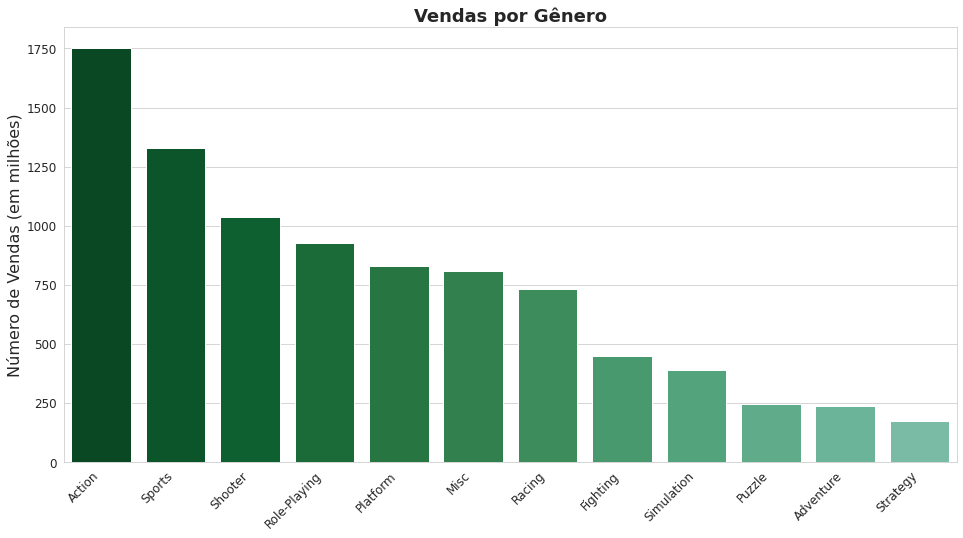

In [12]:
sales_barplot(x=sales_by_genre.index, y=sales_by_genre.values, title='Vendas por Gênero')

In [13]:
sales_by_publisher = sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)
sales_by_publisher

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
                                ...   
Takuyo                            0.01
Otomate                           0.01
Epic Games                        0.01
Inti Creates                      0.01
Interworks Unlimited, Inc.        0.01
Name: Global_Sales, Length: 578, dtype: float64

In [0]:
top_sales_by_publisher = sales_by_publisher.head(10)

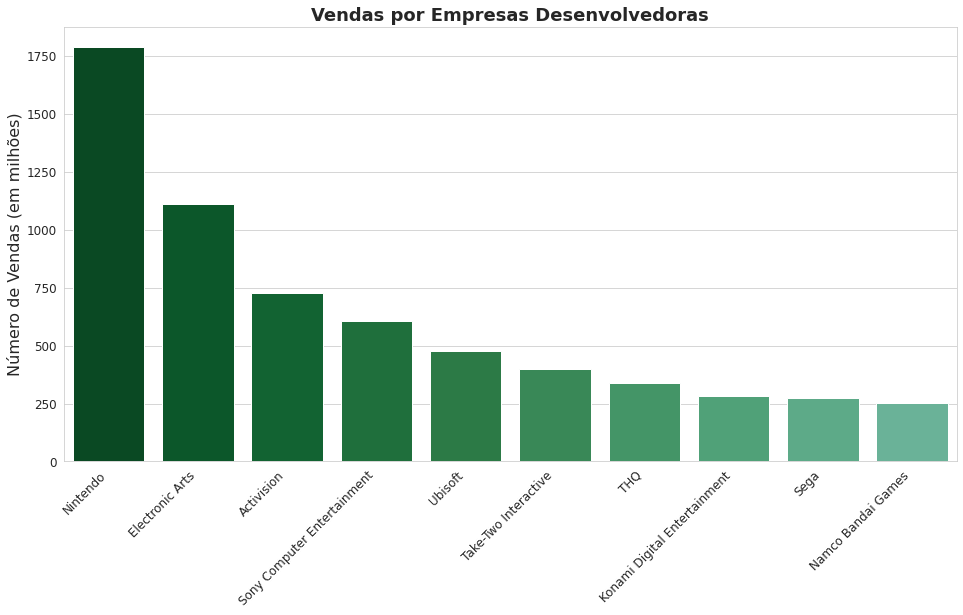

In [15]:
sales_barplot(x=top_sales_by_publisher.index, y=top_sales_by_publisher.values, title='Vendas por Empresas Desenvolvedoras')

In [16]:
sales['Name_Publisher'] = sales['Name'] + ' ' + sales['Year'].astype(str).replace('\.0', '', regex=True) + ' (' + sales['Publisher'] + ')'
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_Publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports 2006 (Nintendo)
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros. 1985 (Nintendo)
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii 2008 (Nintendo)
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort 2009 (Nintendo)
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon Blue 1996 (Nintendo)


In [17]:
top_games_global = sales.sort_values(by='Global_Sales', ascending=False).head(10)
top_games_global

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_Publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports 2006 (Nintendo)
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros. 1985 (Nintendo)
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii 2008 (Nintendo)
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort 2009 (Nintendo)
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon Blue 1996 (Nintendo)
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris 1989 (Nintendo)
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,New Super Mario Bros. 2006 (Nintendo)
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Wii Play 2006 (Nintendo)
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,New Super Mario Bros. Wii 2009 (Nintendo)
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Duck Hunt 1984 (Nintendo)


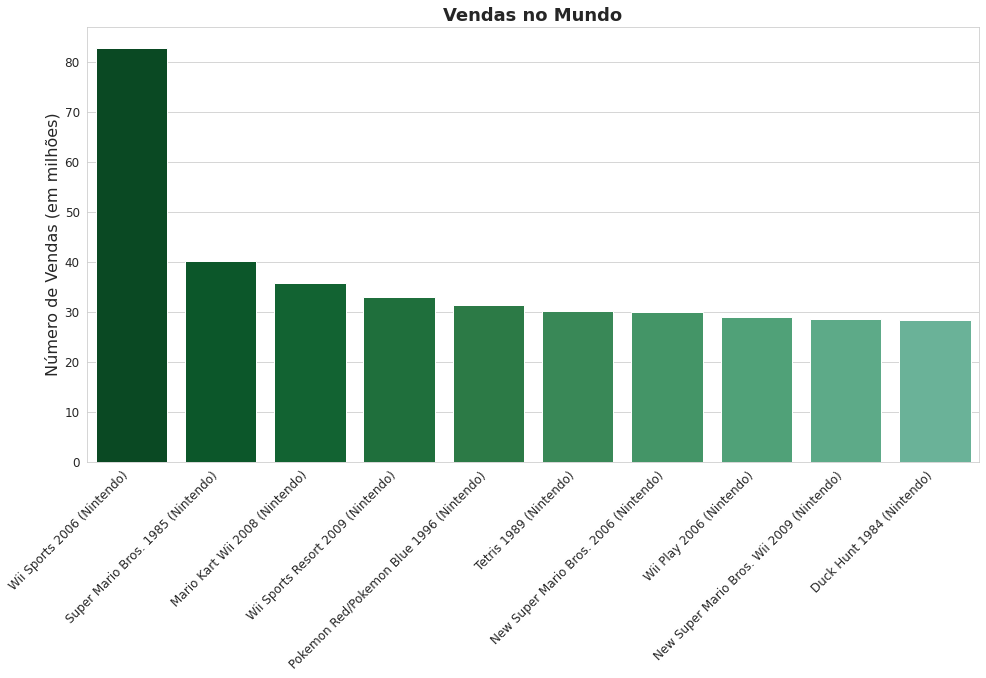

In [18]:
sales_barplot(x=top_games_global['Name_Publisher'], y=top_games_global['Global_Sales'], title='Vendas no Mundo')

In [19]:
top_games_na = sales.sort_values(by='NA_Sales', ascending=False).head(10)
top_games_na

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_Publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports 2006 (Nintendo)
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros. 1985 (Nintendo)
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,Duck Hunt 1984 (Nintendo)
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,Tetris 1989 (Nintendo)
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii 2008 (Nintendo)
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort 2009 (Nintendo)
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,Kinect Adventures! 2010 (Microsoft Game Studios)
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62,New Super Mario Bros. Wii 2009 (Nintendo)
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Wii Play 2006 (Nintendo)
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61,Super Mario World 1990 (Nintendo)


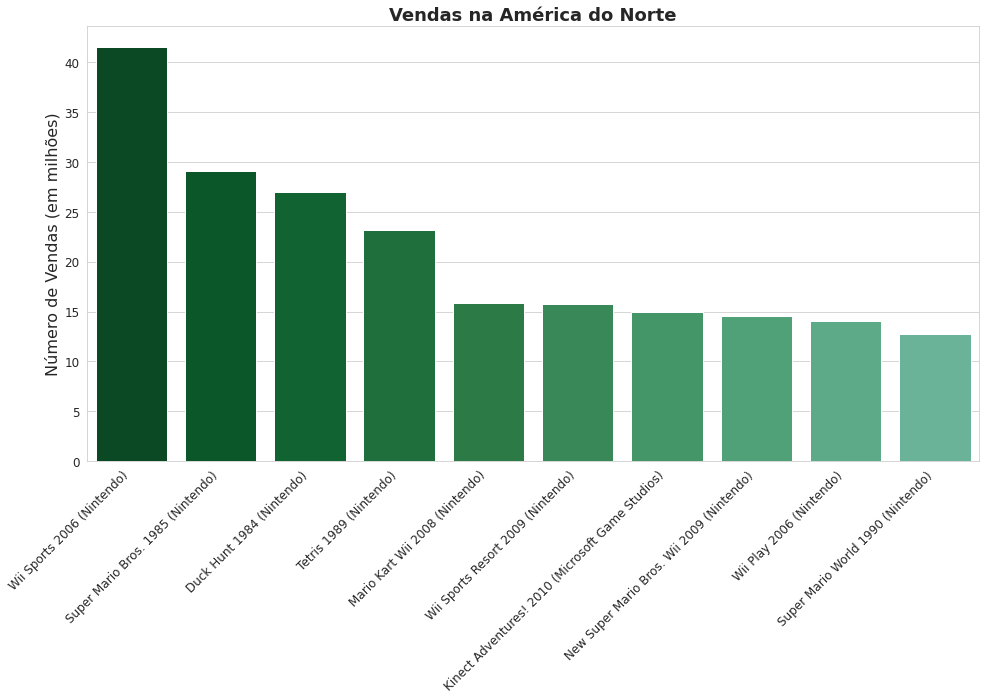

In [20]:
sales_barplot(x=top_games_na['Name_Publisher'], y=top_games_na['NA_Sales'], title='Vendas na América do Norte')

In [21]:
top_games_eu = sales.sort_values(by='EU_Sales', ascending=False).head(10)
top_games_eu

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_Publisher
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,Wii Sports 2006 (Nintendo)
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,Mario Kart Wii 2008 (Nintendo)
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,Wii Sports Resort 2009 (Nintendo)
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76,Nintendogs 2005 (Nintendo)
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,Grand Theft Auto V 2013 (Take-Two Interactive)
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22,Brain Age: Train Your Brain in Minutes a Day 2...
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,New Super Mario Bros. 2006 (Nintendo)
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,Wii Play 2006 (Nintendo)
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon Blue 1996 (Nintendo)
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00,Wii Fit Plus 2009 (Nintendo)


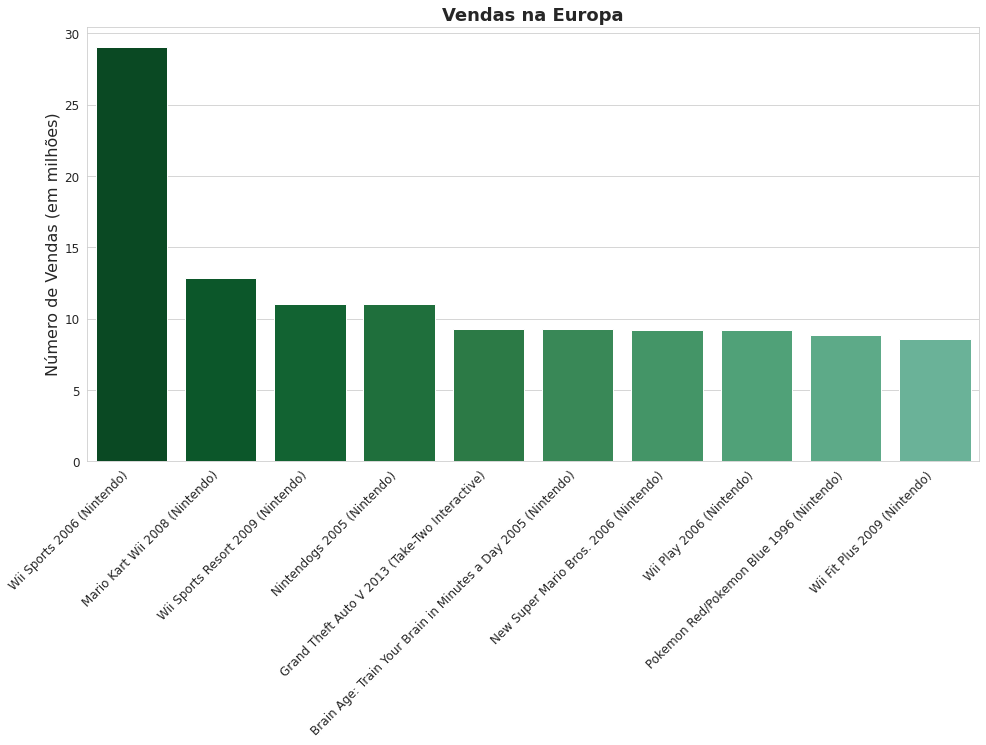

In [22]:
sales_barplot(x=top_games_eu['Name_Publisher'], y=top_games_eu['EU_Sales'], title='Vendas na Europa')

In [23]:
top_games_jp = sales.sort_values(by='JP_Sales', ascending=False).head(10)
top_games_jp

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Name_Publisher
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Pokemon Red/Pokemon Blue 1996 (Nintendo)
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10,Pokemon Gold/Pokemon Silver 1999 (Nintendo)
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Super Mario Bros. 1985 (Nintendo)
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,New Super Mario Bros. 2006 (Nintendo)
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,Pokemon Diamond/Pokemon Pearl 2006 (Nintendo)
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32,Pokemon Black/Pokemon White 2010 (Nintendo)
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85,Pokemon Ruby/Pokemon Sapphire 2002 (Nintendo)
41,42,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.27,Animal Crossing: Wild World 2005 (Nintendo)
27,28,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30,Brain Age 2: More Training in Minutes a Day 20...
214,215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87,Monster Hunter Freedom 3 2010 (Capcom)


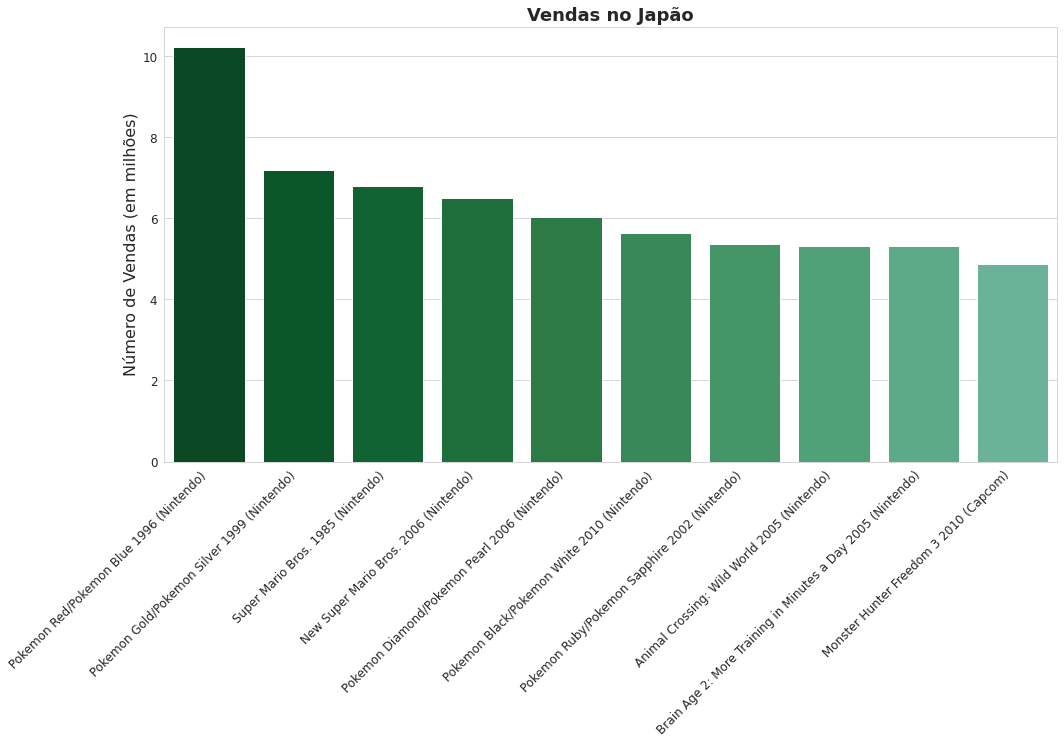

In [24]:
sales_barplot(x=top_games_jp['Name_Publisher'], y=top_games_jp['JP_Sales'], title='Vendas no Japão')